In [49]:
from funcs.notebook import *

# Composite Table of confirmed exoplanets
path = "20_01_2021_confirmed_uncontroversial_exoplanet_systems.csv"

exokepler = pd.read_csv(f"../data/{path}") # composite table

# read in TESS-TOI sample 
path = "../data/2021_01_13_TESS_TOI_CATALOG.csv"


exotess = pd.read_csv(path, skiprows=4)

# rename the relevant columns for transit masking
exotess = exotess.rename(index=str, 
                         columns={'Transit Duration Value':"pl_trandur",
                                  'Orbital Period Value': "pl_orbper", 
                                  'Epoch Value':"pl_tranmidepoch"})


sep = "-----------------------------------------"

def mprint(message):
    print(sep)
    print(message)
    print(sep)
    
offset = {#"K2":2454833.,
          "Kepler":2454833.,
          "TESS":2457000., 
          }    



In [50]:
facility = {"Cerro Tololo Inter-American Observatory":"BJD-TDB",
          "HATSouth":"BJD",
          "MEarth Project":"BJD",
           'Transiting Exoplanet Survey Satellite (TESS)':"BJD-TDB"}

In [51]:
df = pd.read_csv("../results/2020_02_obsdurs.csv")
df

,ID,qcs,lc_n,datapoints,mission,total_available_lcs
0,GJ 1132,9,0,15616,TESS,2
1,GJ 1132,10,0,15290,TESS,2
2,HATS-68,28,0,88067,TESS,2
3,HATS-68,29,0,88813,TESS,2
4,HD 15337,3,0,13095,TESS,3
...,...,...,...,...,...,...
1332,TIC 233211762,21,0,17698,TESS,11
1333,TIC 233211762,22,0,15300,TESS,11
1334,TIC 233211762,24,0,17563,TESS,11
1335,TIC 233211762,25,0,16625,TESS,11


In [55]:
# exokepler[(exokepler.hostname == "TIC 410214986")]
exotess[(exotess.TIC == 410214986)]

,Source Pipeline,TIC,Full TOI ID,TOI Disposition,TIC Right Ascension,TIC Declination,TMag Value,TMag Uncertainty,pl_tranmidepoch,Epoch Error,...,Centroid Offset,TFOP Master,TFOP SG1a,TFOP SG1b,TFOP SG2,TFOP SG3,TFOP SG4,TFOP SG5,Alerted,Updated
1274,qlp,410214986,200.01,PC,354.914556,-69.195787,7.771,0.018,2040.333471,0.000666,...,False,3.0,4.0,3.0,3.0,4.0,4.0,4.0,2018-11-09 21:01:14+0000,2020-11-16 15:35:19+0000


In [61]:

for i, row in df.iloc[61:].iterrows():
    print(i)
    lc = pd.read_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv")
    if row.ID[:3] == "TIC":
        system_tess = exotess[(exotess.TIC == int(row.ID[3:]))]

#     print(system_tess)
    # ID is unique, also ignore entries that have no transits
    # because there is nothing to mask (they are still searched for flares)
    system_kepler = exokepler[(exokepler.hostname == row.ID)]# &
 #                      (exokepler.discoverymethod == "Transit")]
    print(system_kepler, system_tess)
    try:
#         print(system_kepler)
        if system_kepler.shape[0] > 0:
            system_kepler["pl_tranmidepoch"] = (system_kepler.pl_tranmid -
                                                offset[row.mission])
        system = pd.concat([system_kepler, system_tess],ignore_index=True)
#         print(system_kepler)
#         print(system)
#         print(system_kepler.pl_tranmid_systemref.iloc[0],system.pl_tranmid.iloc[0])
        
#         print(facility[system.iloc[0].disc_facility])

    except KeyError:
        system = system_tess
#         print(system.pl_tranmidepoch.iloc[0],system_kepler.pl_tranmid_systemref.iloc[0])
#         print(facility[system.iloc[0].disc_facility])

    print(system)
    system = system.sort_values(by="pl_orbper",ascending=True).iloc[0]
    tmid = system.pl_tranmidepoch
#     print(tmid, system_kepler.pl_tranmid)
    orbper = system.pl_orbper
    tflare = lc.time
    phase = ((tflare - tmid) % orbper) / orbper

    lc["phase"] =phase
    
    lc.to_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv",index=False)

61
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insoler

[1 rows x 40 columns]
     hostname  rowid       pl_name pl_letter     hd_name     hip_name  \
0  HD 41004 A  816.0  HD 41004 A b         b  HD 41004 A  HIP 28393 A   
1         NaN    NaN           NaN       NaN         NaN          NaN   

          tic_id gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  TFOP Master  \
0  TIC 219152539     NaN      2.0      2.0  ...              NaN          NaN   
1            NaN     NaN      NaN      NaN  ...            False          3.0   

  TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0       NaN        NaN      NaN      NaN      NaN      NaN   
1       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-11-09 21:01:14+0000  2020-11-16 15:35:19+0000  

[2 rows x 351 columns]
66
       hostname  rowid       pl_name pl_letter     hd_name     hip_name  \
627  HD 41004 A    816  HD 41004 A b         b  HD 41004 

70
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1374  Kepler-1229   1777  Kepler-1229 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1374  TIC 273373582  Gaia DR2 2086316205543022336        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1374     15.474            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1374  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1374       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid

74
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1374  Kepler-1229   1777  Kepler-1229 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1374  TIC 273373582  Gaia DR2 2086316205543022336        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1374     15.474            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1374  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1374       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid

78
    hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
117  GJ 1061    147  GJ 1061 b         b     NaN      NaN  TIC 79611981   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
117  Gaia DR2 4848140361962951552        1        3  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
117            NaN           NaN                NaN         1        0   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
117       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1274      2040.333471     0.000666  ...            False          3.0   

      TFO

82
      hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
3002  WASP-100   4093  WASP-100 b         b     NaN      NaN  TIC 38846515   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3002  Gaia DR2 4675352109658261376        2        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3002            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3002       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1274      2040.333471     0.000666  ...            False          3.0  

   hostname   rowid     pl_name pl_letter hd_name hip_name        tic_id  \
0  WASP-100  4093.0  WASP-100 b         b     NaN      NaN  TIC 38846515   
1       NaN     NaN         NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4675352109658261376      2.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-11-09 21:01:14+0000  2020-11-16 15:35:19+0000  

[2 rows x 351 columns]
87
      hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
3002  WASP-100   4093  WASP-100 b         b   

91
      hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
3002  WASP-100   4093  WASP-100 b         b     NaN      NaN  TIC 38846515   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3002  Gaia DR2 4675352109658261376        2        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3002            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3002       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1274      2040.333471     0.000666  ...            False          3.0  

95
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Off

99
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Off

103
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

107
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

111
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

115
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

119
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

123
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

127
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

131
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

136
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1142  Kepler-102   1497  Kepler-102 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1142  TIC 123357864  Gaia DR2 2119583201145735808        1        5  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1142     11.492            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1142       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1274             qlp  410214986       200.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1274           354.914556       -69.195787       7.771             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

141
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

145
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2160  Kepler-411   3056  Kepler-411 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2160  TIC 399954349  Gaia DR2 2132768952604988672        2        4  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2160     12.231            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2160  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2160       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

149
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2160  Kepler-411   3056  Kepler-411 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2160  TIC 399954349  Gaia DR2 2132768952604988672        2        4  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2160     12.231            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2160  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2160       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

153
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2160  Kepler-411   3056  Kepler-411 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2160  TIC 399954349  Gaia DR2 2132768952604988672        2        4  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2160     12.231            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2160  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2160       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

157
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2160  Kepler-411   3056  Kepler-411 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2160  TIC 399954349  Gaia DR2 2132768952604988672        2        4  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2160     12.231            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2160  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2160       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

161
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

165
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

169
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

173
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

181
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

185
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

189
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

193
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

197
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

202
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2713  Kepler-93   3753  Kepler-93 b         b     NaN      NaN  TIC 137151335   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2713  Gaia DR2 2052747119115620352        1        2  ...      9.931   

      sy_kepmagerr1 sy_kepmagerr2  \
2713            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2713  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2713       2        0         0            3  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

206
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2491  Kepler-725   3484  Kepler-725 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2491  TIC 164652841  Gaia DR2 2106775024555031936        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2491     15.011            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2491  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2491       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

210
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2491  Kepler-725   3484  Kepler-725 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2491  TIC 164652841  Gaia DR2 2106775024555031936        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2491     15.011            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2491  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2491       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

214
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2491  Kepler-725   3484  Kepler-725 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2491  TIC 164652841  Gaia DR2 2106775024555031936        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2491     15.011            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2491  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2491       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

218
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2491  Kepler-725   3484  Kepler-725 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2491  TIC 164652841  Gaia DR2 2106775024555031936        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2491     15.011            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2491  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2491       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

222
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2491  Kepler-725   3484  Kepler-725 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2491  TIC 164652841  Gaia DR2 2106775024555031936        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2491     15.011            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2491  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2491       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

226
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2250  Kepler-504   3192  Kepler-504 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2250  TIC 164832454  Gaia DR2 2107186134525176960        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2250     14.486            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2250  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2250       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

230
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2250  Kepler-504   3192  Kepler-504 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2250  TIC 164832454  Gaia DR2 2107186134525176960        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2250     14.486            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2250  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2250       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

234
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2250  Kepler-504   3192  Kepler-504 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2250  TIC 164832454  Gaia DR2 2107186134525176960        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2250     14.486            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2250  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2250       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

238
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2250  Kepler-504   3192  Kepler-504 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2250  TIC 164832454  Gaia DR2 2107186134525176960        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2250     14.486            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2250  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2250       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

242
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2250  Kepler-504   3192  Kepler-504 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2250  TIC 164832454  Gaia DR2 2107186134525176960        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2250     14.486            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2250  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2250       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
793            spoc  89256802       457.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
793              58.7249         -26.4237      13.801             0.273   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

247
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
3012  WASP-117   4104  WASP-117 b         b     NaN      NaN  TIC 166739520   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3012  Gaia DR2 4746157737910069888        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3012            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3012       0        0         0           18  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
908            spoc  318937509       516.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
908             112.3815           2.8481       14.15             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
908      1492.649974     0.000949  ...            False          2.0   



  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        1.0      1.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-03-18 17:05:08+0000   

                    Updated  
0  2019-03-18 17:05:08+0000  

[1 rows x 351 columns]
252
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

255
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

259
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insolerr2,

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   
1      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          1.0       4.0        1.0      1.0   
1      NaN  ...            False          1.0       4.0        1.0      1.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-05-17 18:40:33+0000   
1      4.0      4.0      4.0  2019-05-07 17:42:41+0000   

                    Updated  
0  2020-12-21 19:48:08+0000  
1  2020-11-25 17:39:35+0000  

[2 rows x 351 columns]
266
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_tele

269
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

273
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2689  Kepler-908   3726  Kepler-908 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2689  TIC 139106731  Gaia DR2 2076194101502797952        3        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2689     11.524            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2689  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2689       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
257            spoc  15863518      1713.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
257            100.52065        39.843181      10.618             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

     hostname   rowid       pl_name pl_letter hd_name hip_name        tic_id  \
0  Kepler-408  3052.0  Kepler-408 b         b     NaN      NaN  TIC 48450369   
1         NaN     NaN           NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 2131593785132997632      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2019-07-10 19:36:45+0000  2020-05-20 19:58:49+0000  

[2 rows x 351 columns]
278
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b      

282
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

286
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

290
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

294
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

298
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

302
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2156  Kepler-408   3052  Kepler-408 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2156  TIC 48450369  Gaia DR2 2131593785132997632        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2156      8.769            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2156  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2156       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
740             qlp  42015200       848.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
740            24.215976       -39.142556      11.682             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

307
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2018-10-19 23:49:46+0000   

                    Updated  
0  2020-11-06 14:40:46+0000  

[1 rows x 351 columns]
311
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

314
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

318
      hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
3047  WASP-159   4141  WASP-159 b         b     NaN      NaN  TIC 77156657   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3047  Gaia DR2 4864759888238232320        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3047            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3047       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
353            spoc  180695581      1807.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
353           201.283316        38.922485      9.0363             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
353      1899.346311     0.001166  ...            False          1.0   

  

323
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

327
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

331
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

335
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

339
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

343
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

347
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

351
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

355
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2572  Kepler-8   3580  Kepler-8 b         b     NaN      NaN  TIC 123233041   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2572  Gaia DR2 2116730994965905280        1        1  ...     13.563   

      sy_kepmagerr1 sy_kepmagerr2  \
2572            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2572  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        1   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2572       1        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
865            spoc  93125144       523.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
865            84.846542       -19.558202       9.579             0.019   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Mast

[0 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1531            spoc  409934330      1114.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1531           302.147845       -71.552463       7.912             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1531      2038.622586     0.000684  ...            False          3.0   

      TFOP SG1a  TFOP SG1b  TFOP SG2  TFOP SG3 TFOP SG4 TFOP SG5  \
1531        4.0        3.0       3.0       4.0      4.0      4.0   

                       Alerted                   Updated  
1531  2019-08-16 20:20:50+0000  2020-09-18 17:54:55+0000  

[1 rows x 40 columns]
  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            Fal

364
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1213  Kepler-1084   1587  Kepler-1084 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1213  TIC 267749737  Gaia DR2 2129464546506876928        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1213     12.217            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1213  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1213       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1531            spoc  409934330      1114.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1531           302.147845       -71.552463       7.912             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroi

368
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1213  Kepler-1084   1587  Kepler-1084 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1213  TIC 267749737  Gaia DR2 2129464546506876928        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1213     12.217            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1213  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1213       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1531            spoc  409934330      1114.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1531           302.147845       -71.552463       7.912             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroi

372
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1213  Kepler-1084   1587  Kepler-1084 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1213  TIC 267749737  Gaia DR2 2129464546506876928        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1213     12.217            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1213  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1213       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1531            spoc  409934330      1114.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1531           302.147845       -71.552463       7.912             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroi

377
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1213  Kepler-1084   1587  Kepler-1084 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1213  TIC 267749737  Gaia DR2 2129464546506876928        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1213     12.217            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1213  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1213       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1531            spoc  409934330      1114.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1531           302.147845       -71.552463       7.912             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroi

Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insolerr2,

385
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

389
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

393
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

397
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

401
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

405
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

410
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2252  Kepler-506   3194  Kepler-506 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2252  TIC 120317234  Gaia DR2 2103452266056715392        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2252     10.868            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2252  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2252       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1159            spoc  44797824       865.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1159            62.454488       -26.021975       9.774             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offs

415
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1729  Kepler-155   2201  Kepler-155 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1729  TIC 298969755  Gaia DR2 2133351698066484096        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1729     14.258            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1729  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1729       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1398             qlp  278198753       936.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1398           111.036456        -78.44287      12.459             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

419
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
3101   WASP-4   4196  WASP-4 b         b     NaN      NaN  TIC 402026209   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3101  Gaia DR2 6535499658122055552        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3101            NaN           NaN                NaN         2       13   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3101       1        0         4           16  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1398             qlp  278198753       936.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1398           111.036456        -78.44287      12.459             0.018   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1398      2151.759052      0.00169  ...            False          3.0   



  hostname   rowid   pl_name pl_letter hd_name  hip_name         tic_id  \
0   YZ Cet  4285.0  YZ Cet b         b     NaN  HIP 5643  TIC 610210976   
1      NaN     NaN       NaN       NaN     NaN       NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 2358524597030794112      1.0      3.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2019-07-15 19:20:09+0000  2020-12-21 19:01:57+0000  

[2 rows x 351 columns]
424
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
3154  WASP-91   4255  WASP-91 b         b     NaN

428
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        2.0      2.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2020-02-27 22:12:19+0000   

                    Updated  
0  2020-02-27 17:21:26+0000  

[1 rows x 351 columns]
432
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

435
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

439
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

443
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

447
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

451
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

455
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

459
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

463
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2178  Kepler-43   3085  Kepler-43 b         b     NaN      NaN  TIC 164892194   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2178  Gaia DR2 2107314266289095296        1        1  ...     13.958   

      sy_kepmagerr1 sy_kepmagerr2  \
2178            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2178  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2178       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

467
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1467  Kepler-1313   1887  Kepler-1313 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1467  TIC 63213622  Gaia DR2 2125713940547834496        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1467     11.799            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1467  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1467       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offse

471
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1467  Kepler-1313   1887  Kepler-1313 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1467  TIC 63213622  Gaia DR2 2125713940547834496        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1467     11.799            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1467  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1467       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offse

475
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1467  Kepler-1313   1887  Kepler-1313 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1467  TIC 63213622  Gaia DR2 2125713940547834496        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1467     11.799            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1467  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1467       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offse

479
    hostname  rowid    pl_name pl_letter hd_name   hip_name         tic_id  \
148  GJ 3942    199  GJ 3942 b         b     NaN  HIP 79126  TIC 162494287   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
148  Gaia DR2 1428030622526979968        1        1  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
148            NaN           NaN                NaN         0        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
148       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
313      1691.531496     0.003782  ...            False          2.0   

     TFO

483
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1506  Kepler-1349   1933  Kepler-1349 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1506  TIC 405719110  Gaia DR2 2131184938606509952        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1506     11.126            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1506  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1506       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Off

487
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1506  Kepler-1349   1933  Kepler-1349 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1506  TIC 405719110  Gaia DR2 2131184938606509952        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1506     11.126            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1506  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1506       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Off

491
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
2794  LHS 3844   3846  LHS 3844 b         b     NaN      NaN  TIC 410153553   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2794  Gaia DR2 6385548541499112448        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2794            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2794       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
313      1691.531496     0.003782  ...            False          2.0   



495
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2471  Kepler-705   3461  Kepler-705 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2471  TIC 122066949  Gaia DR2 2102244967931917184        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2471     15.849            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2471  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2471       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

499
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2471  Kepler-705   3461  Kepler-705 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2471  TIC 122066949  Gaia DR2 2102244967931917184        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2471     15.849            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2471  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2471       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

503
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2471  Kepler-705   3461  Kepler-705 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2471  TIC 122066949  Gaia DR2 2102244967931917184        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2471     15.849            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2471  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2471       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

507
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2471  Kepler-705   3461  Kepler-705 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2471  TIC 122066949  Gaia DR2 2102244967931917184        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2471     15.849            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2471  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2471       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

511
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

515
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

519
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

523
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

527
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

531
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1784  Kepler-16   2262  Kepler-16 b         b     NaN      NaN  TIC 299096355   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1784  Gaia DR2 2133476355197071616        2        1  ...     11.762   

      sy_kepmagerr1 sy_kepmagerr2  \
1784            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1784  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1784       0        6         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

535
      hostname  rowid      pl_name pl_letter    hd_name   hip_name  \
409  HD 147379    518  HD 147379 b         b  HD 147379  HIP 79755   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
409  TIC 230073581  Gaia DR2 1642641410934267008        2        1  ...   

     sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes  \
409        NaN            NaN           NaN                NaN         3   

    st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
409        1       0        2         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
313      1691.531496     0.003782  ...            False          2.

540
      hostname  rowid      pl_name pl_letter    hd_name   hip_name  \
409  HD 147379    518  HD 147379 b         b  HD 147379  HIP 79755   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
409  TIC 230073581  Gaia DR2 1642641410934267008        2        1  ...   

     sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes  \
409        NaN            NaN           NaN                NaN         3   

    st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
409        1       0        2         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
313      1691.531496     0.003782  ...            False          2.

545
      hostname  rowid      pl_name pl_letter    hd_name   hip_name  \
409  HD 147379    518  HD 147379 b         b  HD 147379  HIP 79755   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
409  TIC 230073581  Gaia DR2 1642641410934267008        2        1  ...   

     sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes  \
409        NaN            NaN           NaN                NaN         3   

    st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
409        1       0        2         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
313            spoc  420112587      1760.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
313           290.173872        73.196346     12.4989          0.007678   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
313      1691.531496     0.003782  ...            False          2.

550
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname   rowid    pl_name pl_letter hd_name hip_name         tic_id  \
0  WASP-99  4264.0  WASP-99 b         b     NaN      NaN  TIC 166836920   
1      NaN     NaN        NaN       NaN     NaN      NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4745660479479743488      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-09-30 13:26:55+0000  2020-09-30 13:26:55+0000  

[2 rows x 351 columns]
555
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
3163  WASP-99   4264  WASP-99 b         b     NaN

  hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
0   GJ 685  229.0  GJ 685 b         b     NaN  HIP 86087  TIC 219780306   
1      NaN    NaN       NaN       NaN     NaN        NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 1439069444391326208      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-09-30 13:26:55+0000  2020-09-30 13:26:55+0000  

[2 rows x 351 columns]
559
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
165   GJ 685    229  GJ 685 b         b     NaN  

563
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
165   GJ 685    229  GJ 685 b         b     NaN  HIP 86087  TIC 219780306   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
165  Gaia DR2 1439069444391326208        1        1  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
165            NaN           NaN                NaN         1        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
165       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2290            spoc  459837008      2267.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2290            65.052172        84.901766     12.2591           0.00735   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
2290      1816.154418     0.001029  ...            False          2.0   

    

  hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
0   GJ 685  229.0  GJ 685 b         b     NaN  HIP 86087  TIC 219780306   
1      NaN    NaN       NaN       NaN     NaN        NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 1439069444391326208      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-09-30 13:26:55+0000  2020-09-30 13:26:55+0000  

[2 rows x 351 columns]
568
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
165   GJ 685    229  GJ 685 b         b     NaN  

[1 rows x 40 columns]
     hostname   rowid       pl_name pl_letter hd_name hip_name         tic_id  \
0  Kepler-974  3810.0  Kepler-974 b         b     NaN      NaN  TIC 120418600   
1         NaN     NaN           NaN       NaN     NaN      NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 2103377980301947264      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-09-30 13:26:55+0000  2020-09-30 13:26:55+0000  

[2 rows x 351 columns]
572
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2762  Kepler-974  

576
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2762  Kepler-974   3810  Kepler-974 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2762  TIC 120418600  Gaia DR2 2103377980301947264        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2762     14.404            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2762  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2762       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2290            spoc  459837008      2267.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2290            65.052172        84.901766     12.2591           0.00735   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

581
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2762  Kepler-974   3810  Kepler-974 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2762  TIC 120418600  Gaia DR2 2103377980301947264        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2762     14.404            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2762  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2762       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2290            spoc  459837008      2267.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2290            65.052172        84.901766     12.2591           0.00735   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          1.0       4.0        1.0      1.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-08-27 16:09:26+0000   

                    Updated  
0  2020-09-11 21:35:53+0000  

[1 rows x 351 columns]
585
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

588
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

592
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
0  GJ 3634  197.0  GJ 3634 b         b     NaN      NaN  TIC 49064384   
1      NaN    NaN        NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 5452743423618768000      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          1.0       4.0        1.0      1.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-06-19 06:00:39+0000  2020-06-19 06:00:39+0000  

[2 rows x 351 columns]
596
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      N

600
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

604
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

608
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

612
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

616
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Maste

     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Maste

628
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

632
     hostname  rowid   pl_name pl_letter hd_name hip_name          tic_id  \
1108   KOI-13   1444  KOI-13 b         b     NaN      NaN  TIC 1717079071   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1108  Gaia DR2 2130632159134827392        3        1  ...      9.958   

      sy_kepmagerr1 sy_kepmagerr2  \
1108            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1108  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         3        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1108       0        0        15            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2030            spoc  368287008      2015.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2030           232.132925        27.360798     12.8387          0.007319   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP M

636
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

641
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

645
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
132   GJ 273    172  GJ 273 b         b     NaN  HIP 36208  TIC 318686860   

    gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
132     NaN        1        2  ...        NaN            NaN           NaN   

     sy_kepmag_reflink pl_nnotes st_nphot st_nrvc st_nspec pl_nespec  \
132                NaN         0        1       0        1         0   

    pl_ntranspec  
132            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1628            spoc  264544388      1893.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1628           326.437831         79.61386     8.43389            0.0062   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1628      1824.861486     0.011409  ...              NaN          3.0   

      TFOP SG1a  TFOP SG1b  TFOP SG2  TFOP SG3 T

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        1.0      1.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-08-16 20:20:42+0000   

                    Updated  
0  2019-08-16 20:20:42+0000  

[1 rows x 351 columns]
649
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

653
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
2968  TOI-540   4042  TOI-540 b         b     NaN      NaN  TIC 200322593   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2968  Gaia DR2 4785886941312921344        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2968            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2968       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1587            spoc  101230735      1060.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1587           299.290973       -48.934438       9.628             0.019   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1587      1653.965927     0.002671  ...            False          2.0   

657
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2020-02-19 23:47:13+0000   

                    Updated  
0  2020-09-11 17:17:22+0000  

[1 rows x 351 columns]
661
        hostname  rowid       pl_name pl_letter hd_name   hip_name  \
2798  LTT 1445 A   3851  LTT 1445 A b         b     NaN  HIP 14101   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2798  TIC 98796344  Gaia DR2 5153091836072107136        3        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes  \
2798        NaN            NaN           NaN                NaN         2   

     st_nphot st_nrvc st_nsp

  hostname  rowid   pl_name pl_letter    hd_name    hip_name         tic_id  \
0   GJ 832  232.0  GJ 832 b         b  HD 204961  HIP 106440  TIC 139754153   
1      NaN    NaN       NaN       NaN        NaN         NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 6562924609150908416      1.0      2.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-02-19 23:47:13+0000  2020-09-11 17:17:22+0000  

[2 rows x 351 columns]
666
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnu

669
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-10-17 00:30:12+0000   

                    Updated  
0  2020-09-11 21:35:32+0000  

[1 rows x 351 columns]
673
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

677
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        1.0      1.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2018-10-22 18:35:20+0000   

                    Updated  
0  2018-10-22 18:35:20+0000  

[1 rows x 351 columns]
682
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

685
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

689
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1934  Kepler-207   2499  Kepler-207 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1934  TIC 159217436  Gaia DR2 2101898759208960640        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1934     13.182            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1934  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1934       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

693
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

697
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

701
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

705
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

709
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

713
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1980  Kepler-249   2621  Kepler-249 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1980  TIC 272942100  Gaia DR2 2078807228323035008        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1980     15.234            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1980  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1980       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1290            spoc  259962054       203.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1290              43.0188         -67.6876       12.17              0.05   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

717
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

721
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2396  Kepler-636   3378  Kepler-636 b         b     NaN      NaN   

             tic_id gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  sy_kepmagerr1  \
2396  TIC 138297607     NaN        2        1  ...     13.653            NaN   

     sy_kepmagerr2                                  sy_kepmag_reflink  \
2396           NaN  <a refstr=STASSUN_ET_AL__2019 href=https://ui....   

     pl_nnotes st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
2396         2        0       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
710             qlp  328350926       392.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
710            46.931654         0.861311       8.253             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
710         1411.599      0.00022  ...       

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2020-07-29 05:09:23+0000   

                    Updated  
0  2020-09-12 00:37:02+0000  

[1 rows x 351 columns]
725
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
3160  WASP-96   4261  WASP-96 b         b     NaN      NaN  TIC 160148385   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3160  Gaia DR2 4990044668377961984        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3160            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl

729
      hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1110  KOI-1599   1447  KOI-1599.01         c     NaN      NaN  TIC 170647523   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1110  Gaia DR2 2073779161653824640        1        2  ...     14.802   

      sy_kepmagerr1 sy_kepmagerr2  \
1110            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1110       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2105            spoc  236387002      2119.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2105           244.430023        26.304182      10.398             0.007   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

733
      hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1110  KOI-1599   1447  KOI-1599.01         c     NaN      NaN  TIC 170647523   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1110  Gaia DR2 2073779161653824640        1        2  ...     14.802   

      sy_kepmagerr1 sy_kepmagerr2  \
1110            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1110       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2105            spoc  236387002      2119.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2105           244.430023        26.304182      10.398             0.007   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

737
      hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
1110  KOI-1599   1447  KOI-1599.01         c     NaN      NaN  TIC 170647523   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1110  Gaia DR2 2073779161653824640        1        2  ...     14.802   

      sy_kepmagerr1 sy_kepmagerr2  \
1110            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1110       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2105            spoc  236387002      2119.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2105           244.430023        26.304182      10.398             0.007   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-06-06 20:53:59+0000   

                    Updated  
0  2019-06-06 20:53:59+0000  

[1 rows x 351 columns]
741
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insolerr2,

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-06-06 20:53:59+0000   

                    Updated  
0  2019-06-06 20:53:59+0000  

[1 rows x 351 columns]
749
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, p

752
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

756
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

760
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

768
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

772
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

776
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

780
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

784
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

788
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1540  Kepler-138   1974  Kepler-138 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1540  TIC 159376971  Gaia DR2 2102053446751282944        1        3  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1540     12.925            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1540  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1540       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
612            spoc  32090583       218.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
612             58.42027       -68.739532      13.551             0.064   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        2.0      2.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2020-07-15 20:44:31+0000   

                    Updated  
0  2020-07-15 20:44:31+0000  

[1 rows x 351 columns]
793
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1353  Kepler-121   1751  Kepler-121 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1353  TIC 120765800  Gaia DR2 2100654421280638976        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1353     14.708            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1353  <a r

797
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1353  Kepler-121   1751  Kepler-121 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1353  TIC 120765800  Gaia DR2 2100654421280638976        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1353     14.708            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1353  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1353       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

801
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1353  Kepler-121   1751  Kepler-121 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1353  TIC 120765800  Gaia DR2 2100654421280638976        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1353     14.708            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1353  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1353       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

805
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1353  Kepler-121   1751  Kepler-121 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1353  TIC 120765800  Gaia DR2 2100654421280638976        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1353     14.708            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1353  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1353       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

809
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

813
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

817
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

821
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

825
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

829
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

833
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

837
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
1153  Kepler-103   1512  Kepler-103 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1153  TIC 121865656  Gaia DR2 2101243789577188736        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1153     12.287            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1153  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1153       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

841
         hostname  rowid        pl_name pl_letter hd_name   hip_name  \
2926  Proxima Cen   3992  Proxima Cen b         b     NaN  HIP 70890   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2926  TIC 388857263  Gaia DR2 5853498713160606720        3        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes  \
2926        NaN            NaN           NaN                NaN         1   

     st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
2926        5       2        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2058            spoc  224298134      2079.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2058           185.339399        57.752467     10.8515          0.007414   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
2058       1711.95933     0.001302  ...            F

845
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

849
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
3033  WASP-140   4126  WASP-140 b         b     NaN      NaN  TIC 178284730   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3033  Gaia DR2 5094154336330994688        2        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3033            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
3033       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
770       1416.62451      0.00447  ...            False          2.0   



853
                   hostname  rowid                    pl_name pl_letter  \
11  2MASS J02192210-3925225     13  2MASS J02192210-3925225 b         b   

   hd_name hip_name        tic_id                       gaia_id  sy_snum  \
11     NaN      NaN  TIC 77111651  Gaia DR2 4963614887043956096        1   

    sy_pnum  ...  sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink  \
11        1  ...        NaN            NaN           NaN                NaN   

   pl_nnotes st_nphot st_nrvc st_nspec pl_nespec pl_ntranspec  
11         0        0       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
770       1416.62451      0.004

857
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

861
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

865
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

869
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

873
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

877
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

881
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

885
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

889
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

893
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2443  Kepler-68   3430  Kepler-68 b         b     NaN      NaN  TIC 417676622   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2443  Gaia DR2 2129550445852902656        2        3  ...      9.997   

      sy_kepmagerr1 sy_kepmagerr2  \
2443            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2443  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2443       3        0         0            3  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
770             qlp  257605131       451.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
770            62.966446       -37.939783      10.267             0.006   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

897
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2375  Kepler-617   3351  Kepler-617 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2375  TIC 164557035  Gaia DR2 2107607354856794880        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2375     14.818            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2375  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2375       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

901
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2375  Kepler-617   3351  Kepler-617 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2375  TIC 164557035  Gaia DR2 2107607354856794880        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2375     14.818            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2375  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2375       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

905
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2375  Kepler-617   3351  Kepler-617 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2375  TIC 164557035  Gaia DR2 2107607354856794880        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2375     14.818            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2375  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2375       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

909
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2375  Kepler-617   3351  Kepler-617 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2375  TIC 164557035  Gaia DR2 2107607354856794880        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2375     14.818            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2375  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2375       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

913
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1841  Kepler-1651   2330  Kepler-1651 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1841  TIC 48353358  Gaia DR2 2131725447350716032        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1841     13.496            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1841  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         5        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1841       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

917
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1841  Kepler-1651   2330  Kepler-1651 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1841  TIC 48353358  Gaia DR2 2131725447350716032        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1841     13.496            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1841  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         5        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1841       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset 

         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1841  Kepler-1651   2330  Kepler-1651 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1841  TIC 48353358  Gaia DR2 2131725447350716032        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1841     13.496            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1841  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         5        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1841       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
857            spoc  32830028       549.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
857              86.7522         -24.8422       14.31             0.059   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFO

925
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2216  Kepler-473   3150  Kepler-473 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2216  TIC 120961632  Gaia DR2 2100009935669354240        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2216     13.397            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2216  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2216       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline      TIC  Full TOI ID TOI Disposition  \
1421            spoc  2760710       227.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1421             356.5277         -16.6912      14.277             0.059   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset

929
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2216  Kepler-473   3150  Kepler-473 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2216  TIC 120961632  Gaia DR2 2100009935669354240        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2216     13.397            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2216  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2216       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline      TIC  Full TOI ID TOI Disposition  \
1421            spoc  2760710       227.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1421             356.5277         -16.6912      14.277             0.059   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset

933
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2216  Kepler-473   3150  Kepler-473 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2216  TIC 120961632  Gaia DR2 2100009935669354240        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2216     13.397            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2216  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2216       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline      TIC  Full TOI ID TOI Disposition  \
1421            spoc  2760710       227.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1421             356.5277         -16.6912      14.277             0.059   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset

937
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2216  Kepler-473   3150  Kepler-473 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2216  TIC 120961632  Gaia DR2 2100009935669354240        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2216     13.397            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2216  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2216       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline      TIC  Full TOI ID TOI Disposition  \
1421            spoc  2760710       227.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1421             356.5277         -16.6912      14.277             0.059   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset

941
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2216  Kepler-473   3150  Kepler-473 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2216  TIC 120961632  Gaia DR2 2100009935669354240        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2216     13.397            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2216  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2216       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline      TIC  Full TOI ID TOI Disposition  \
1421            spoc  2760710       227.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1421             356.5277         -16.6912      14.277             0.059   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset

945
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insole

   hostname   rowid     pl_name pl_letter hd_name hip_name         tic_id  \
0  WASP-120  4108.0  WASP-120 b         b     NaN      NaN  TIC 152476657   
1       NaN     NaN         NaN       NaN     NaN      NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4837286842167819776      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-05-07 18:04:46+0000  2020-09-23 12:11:57+0000  

[2 rows x 351 columns]
950
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
3016  WASP-120   4108  WASP-120 b        

  hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
0   GJ 163  161.0  GJ 163 b         b     NaN  HIP 19394  TIC 219221189   
1      NaN    NaN       NaN       NaN     NaN        NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4780294722094459904      1.0      3.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          2.0       4.0        2.0      2.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2020-05-07 18:04:46+0000  2020-09-23 12:11:57+0000  

[2 rows x 351 columns]
954
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
126   GJ 163    161  GJ 163 b         b     NaN  

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2018-09-05 18:51:57+0000   

                    Updated  
0  2020-10-27 12:59:05+0000  

[1 rows x 351 columns]
958
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
3029  WASP-136   4122  WASP-136 b         b     NaN      NaN  TIC 176220787   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
3029  Gaia DR2 2441013811932929280        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
3029            NaN           NaN                NaN         1        0   

     st_nrvc st_nspe

    hostname   rowid      pl_name pl_letter hd_name hip_name        tic_id  \
0  Kepler-42  3073.0  Kepler-42 b         b     NaN      NaN  TIC 63126862   
1        NaN     NaN          NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 2126556132093765888      1.0      3.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-11-30 22:06:24+0000  2018-11-30 22:06:24+0000  

[2 rows x 351 columns]
962
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b  

966
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

970
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

974
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

978
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

982
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

986
       hostname  rowid      pl_name pl_letter hd_name hip_name        tic_id  \
2169  Kepler-42   3073  Kepler-42 b         b     NaN      NaN  TIC 63126862   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2169  Gaia DR2 2126556132093765888        1        3  ...      15.92   

      sy_kepmagerr1 sy_kepmagerr2  \
2169            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2169  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         2        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2169       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2142  Kepler-396   3020  Kepler-396 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2142  TIC 27769688  Gaia DR2 2134847343119885440        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2142     11.921            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2142       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

994
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2142  Kepler-396   3020  Kepler-396 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2142  TIC 27769688  Gaia DR2 2134847343119885440        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2142     11.921            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2142       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

998
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2142  Kepler-396   3020  Kepler-396 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2142  TIC 27769688  Gaia DR2 2134847343119885440        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2142     11.921            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2142       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  T

        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2142  Kepler-396   3020  Kepler-396 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2142  TIC 27769688  Gaia DR2 2134847343119885440        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2142     11.921            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2142       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP 

1007
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2142  Kepler-396   3020  Kepler-396 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2142  TIC 27769688  Gaia DR2 2134847343119885440        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2142     11.921            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2142  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2142       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

  hostname   rowid    pl_name pl_letter hd_name hip_name         tic_id  \
0  TOI-700  4044.0  TOI-700 b         b     NaN      NaN  TIC 150428135   
1      NaN     NaN        NaN       NaN     NaN      NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 5284517766615492736      1.0      3.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-11-30 22:06:24+0000  2018-11-30 22:06:24+0000  

[2 rows x 351 columns]
1012
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
2970  TOI-700   4044  TOI-700 b         b     Na

1016
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
2970  TOI-700   4044  TOI-700 b         b     NaN      NaN  TIC 150428135   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2970  Gaia DR2 5284517766615492736        1        3  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2970            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2970       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
660      2116.147851      0.00108  ...            False          3.0   

   

1020
     hostname  rowid    pl_name pl_letter hd_name hip_name         tic_id  \
2970  TOI-700   4044  TOI-700 b         b     NaN      NaN  TIC 150428135   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2970  Gaia DR2 5284517766615492736        1        3  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2970            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2970       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
660            spoc  120916706       263.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
660              37.1081         -25.0974      15.851             0.062   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
660      2116.147851      0.00108  ...            False          3.0   

   

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          2.0       4.0        2.0      2.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-11-14 17:07:15+0000   

                    Updated  
0  2020-09-11 16:55:01+0000  

[1 rows x 351 columns]
1024
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, 

1028
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

1032
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

1036
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1040
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1044
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1048
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1052
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1056
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1060
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1064
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1068
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1072
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1076
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
1106   KOI-12   1442  KOI-12 b         b     NaN      NaN  TIC 169461816   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
1106  Gaia DR2 2073860662955260416        1        2  ...     11.353   

      sy_kepmagerr1 sy_kepmagerr2  \
1106            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1106  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1106       0        0         0            2  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Ma

1081
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1259  Kepler-1125   1645  Kepler-1125 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1259  TIC 184009076  Gaia DR2 2076598687419100800        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1259     14.874            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1259  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1259       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centro

1085
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1259  Kepler-1125   1645  Kepler-1125 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1259  TIC 184009076  Gaia DR2 2076598687419100800        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1259     14.874            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1259  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1259       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centro

1089
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1259  Kepler-1125   1645  Kepler-1125 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1259  TIC 184009076  Gaia DR2 2076598687419100800        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1259     14.874            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1259  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1259       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centro

1093
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
166   GJ 687    230  GJ 687 b         b     NaN  HIP 86162  TIC 233193964   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
166  Gaia DR2 1637645127018395776        1        2  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
166            NaN           NaN                NaN         1        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
166       0        3         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1894      1685.345871     0.000565  ...            False          2.0   

   

    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
166   GJ 687    230  GJ 687 b         b     NaN  HIP 86162  TIC 233193964   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
166  Gaia DR2 1637645127018395776        1        2  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
166            NaN           NaN                NaN         1        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
166       0        3         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1894      1685.345871     0.000565  ...            False          2.0   

      TF

1101
    hostname  rowid   pl_name pl_letter hd_name   hip_name         tic_id  \
166   GJ 687    230  GJ 687 b         b     NaN  HIP 86162  TIC 233193964   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
166  Gaia DR2 1637645127018395776        1        2  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
166            NaN           NaN                NaN         1        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
166       0        3         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1894      1685.345871     0.000565  ...            False          2.0   

   

1105
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2582  Kepler-808   3596  Kepler-808 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2582  TIC 26417717  Gaia DR2 2129330577887487744        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2582     14.285            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2582  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2582       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Off

1109
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2582  Kepler-808   3596  Kepler-808 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2582  TIC 26417717  Gaia DR2 2129330577887487744        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2582     14.285            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2582  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2582       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1894            spoc  377293776      1450.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1894           286.853477        59.085933     10.0306          0.007307   

      pl_tranmidepoch  Epoch Error  ...  Centroid Off

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...              NaN          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-11-14 17:07:15+0000   

                    Updated  
0  2019-11-14 17:07:15+0000  

[1 rows x 351 columns]
1114
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, 

1118
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2312  Kepler-560   3274  Kepler-560 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2312  TIC 239275865  Gaia DR2 2082162147537254400        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2312     14.708            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2312  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         5        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2312       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Off

     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1

1126
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1130
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1134
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1138
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1142
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1146
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1150
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1154
     hostname  rowid     pl_name pl_letter hd_name   hip_name        tic_id  \
182  HAT-P-11    255  HAT-P-11 b         b     NaN  HIP 97657  TIC 28230919   

                          gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
182  Gaia DR2 2086512227851023872        1        2  ...      9.174   

     sy_kepmagerr1 sy_kepmagerr2  \
182            NaN           NaN   

                                     sy_kepmag_reflink pl_nnotes st_nphot  \
182  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1       13   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
182       1        0         0           36  

[1 rows x 313 columns]      Source Pipeline       TIC  Full TOI ID TOI Disposition  \
1876            spoc  13684720      1433.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1876           305.538023        36.064572     12.4647          0.007419   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master

1159
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

1163
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...              NaN          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-05-07 17:42:40+0000   

                    Updated  
0  2019-05-07 17:42:40+0000  

[1 rows x 351 columns]
1167
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, 

1170
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-10-17 00:30:12+0000   

                    Updated  
0  2020-09-23 12:18:04+0000  

[1 rows x 351 columns]
1174
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, 

1178
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

1183
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

  hostname   rowid     pl_name pl_letter hd_name hip_name        tic_id  \
0  TOI-216  4032.0  TOI-216.01         c     NaN      NaN  TIC 55652896   
1      NaN     NaN         NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4664811297844004352      1.0      2.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2019-10-17 00:30:12+0000  2020-09-23 12:18:04+0000  

[2 rows x 351 columns]
1188
     hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
2962  TOI-216   4032  TOI-216.01         c     N

1192
     hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
2962  TOI-216   4032  TOI-216.01         c     NaN      NaN  TIC 55652896   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2962  Gaia DR2 4664811297844004352        1        2  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2962            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2962       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1675            spoc  233120979      1251.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1675           273.529407        62.858256     10.6479            0.0061   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1675      1685.828767     0.000215  ...            False          3.0  

1196
     hostname  rowid     pl_name pl_letter hd_name hip_name        tic_id  \
2962  TOI-216   4032  TOI-216.01         c     NaN      NaN  TIC 55652896   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2962  Gaia DR2 4664811297844004352        1        2  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2962            NaN           NaN                NaN         0        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2962       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1675            spoc  233120979      1251.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1675           273.529407        62.858256     10.6479            0.0061   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1675      1685.828767     0.000215  ...            False          3.0  

1200
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insolerr2,

1208
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2232  Kepler-488   3170  Kepler-488 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2232  TIC 48217457  Gaia DR2 2131712669826755328        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2232     14.804            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2232  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2232       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1212
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2232  Kepler-488   3170  Kepler-488 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2232  TIC 48217457  Gaia DR2 2131712669826755328        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2232     14.804            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2232  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2232       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1216
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2232  Kepler-488   3170  Kepler-488 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2232  TIC 48217457  Gaia DR2 2131712669826755328        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2232     14.804            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2232  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2232       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1220
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2232  Kepler-488   3170  Kepler-488 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2232  TIC 48217457  Gaia DR2 2131712669826755328        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2232     14.804            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2232  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2232       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1224
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2232  Kepler-488   3170  Kepler-488 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2232  TIC 48217457  Gaia DR2 2131712669826755328        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2232     14.804            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2232  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2232       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1228
     hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
2972  TOI-813   4049  TOI-813 b         b     NaN      NaN  TIC 55525572   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2972  Gaia DR2 4665704096987467776        1        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2972            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2972       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
484      1325.491317      0.00007  ...            False          3.0   

     

  hostname   rowid    pl_name pl_letter hd_name hip_name        tic_id  \
0  TOI-813  4049.0  TOI-813 b         b     NaN      NaN  TIC 55525572   
1      NaN     NaN        NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4665704096987467776      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-10-22 18:35:11+0000  2020-11-17 19:32:21+0000  

[2 rows x 351 columns]
1233
     hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
2972  TOI-813   4049  TOI-813 b         b     NaN   

  hostname   rowid    pl_name pl_letter hd_name hip_name        tic_id  \
0  TOI-813  4049.0  TOI-813 b         b     NaN      NaN  TIC 55525572   
1      NaN     NaN        NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4665704096987467776      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-10-22 18:35:11+0000  2020-11-17 19:32:21+0000  

[2 rows x 351 columns]
1237
     hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
2972  TOI-813   4049  TOI-813 b         b     NaN   

  hostname   rowid    pl_name pl_letter hd_name hip_name        tic_id  \
0  TOI-813  4049.0  TOI-813 b         b     NaN      NaN  TIC 55525572   
1      NaN     NaN        NaN       NaN     NaN      NaN           NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4665704096987467776      1.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2018-10-22 18:35:11+0000  2020-11-17 19:32:21+0000  

[2 rows x 351 columns]
1241
     hostname  rowid    pl_name pl_letter hd_name hip_name        tic_id  \
2972  TOI-813   4049  TOI-813 b         b     NaN   

1245
     hostname  rowid   pl_name pl_letter hd_name hip_name         tic_id  \
2939   RR Cae   4005  RR Cae b         b     NaN      NaN  TIC 219244444   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2939  Gaia DR2 4788741548375134336        2        1  ...        NaN   

      sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
2939            NaN           NaN                NaN         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2939       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline        TIC  Full TOI ID TOI Disposition  \
484             qlp  206609630       212.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
484               22.551         -59.5832      12.186              0.04   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
484      1325.491317      0.00007  ...            False          3.0   

     

1249
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

   hostname   rowid     pl_name pl_letter hd_name hip_name         tic_id  \
0  WASP-139  4124.0  WASP-139 b         b     NaN      NaN  TIC 159951311   
1       NaN     NaN         NaN       NaN     NaN      NaN            NaN   

                        gaia_id  sy_snum  sy_pnum  ...  Centroid Offset  \
0  Gaia DR2 4851398799032507776      2.0      1.0  ...              NaN   
1                           NaN      NaN      NaN  ...            False   

   TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2 TFOP SG3 TFOP SG4 TFOP SG5  \
0          NaN       NaN        NaN      NaN      NaN      NaN      NaN   
1          3.0       4.0        3.0      3.0      4.0      4.0      4.0   

                    Alerted                   Updated  
0                       NaN                       NaN  
1  2019-05-17 18:40:33+0000  2019-05-17 18:40:33+0000  

[2 rows x 351 columns]
1253
      hostname  rowid     pl_name pl_letter hd_name hip_name         tic_id  \
3031  WASP-139   4124  WASP-139 b       

1257
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2110  Kepler-367   2953  Kepler-367 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2110  TIC 28159518  Gaia DR2 2087250476887856256        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2110     12.879            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2110       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TF

1261
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2110  Kepler-367   2953  Kepler-367 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2110  TIC 28159518  Gaia DR2 2087250476887856256        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2110     12.879            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2110       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TF

1265
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2110  Kepler-367   2953  Kepler-367 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2110  TIC 28159518  Gaia DR2 2087250476887856256        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2110     12.879            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2110       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TF

1269
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2110  Kepler-367   2953  Kepler-367 b         b     NaN      NaN   

            tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2110  TIC 28159518  Gaia DR2 2087250476887856256        1        2  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2110     12.879            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2110  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2110       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TF

1273
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1277
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1281
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1285
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1289
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1293
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1297
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1301
       hostname  rowid      pl_name pl_letter hd_name hip_name         tic_id  \
2300  Kepler-55   3255  Kepler-55 b         b     NaN      NaN  TIC 164884002   

                           gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
2300  Gaia DR2 2105930840143687680        1        5  ...     15.791   

      sy_kepmagerr1 sy_kepmagerr2  \
2300            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2300  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2300       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP

1305
        hostname  rowid       pl_name pl_letter hd_name hip_name  \
2280  Kepler-531   3231  Kepler-531 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
2280  TIC 243272677  Gaia DR2 2131181055955983232        1        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
2280      13.34            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
2280  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         1        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
2280       0        0         0            0  

[1 rows x 313 columns]     Source Pipeline       TIC  Full TOI ID TOI Disposition  \
771            spoc  77951245       450.01              PC   

     TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
771            79.004939       -31.412704      12.375             0.018   

     pl_tranmidepoch  Epoch Error  ...  Centroid Offset  

1310
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

1314
         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1849  Kepler-1661   2340  Kepler-1661 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1849  TIC 164886585  Gaia DR2 2104078025612319360        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1849     14.216            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1849  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         4        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1849       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2292            spoc  310231275      2265.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2292           239.787552        32.396416      9.1021            0.0061   

      pl_tranmidepoch  Epoch Error  ...  Centro

         hostname  rowid        pl_name pl_letter hd_name hip_name  \
1849  Kepler-1661   2340  Kepler-1661 b         b     NaN      NaN   

             tic_id                       gaia_id  sy_snum  sy_pnum  ...  \
1849  TIC 164886585  Gaia DR2 2104078025612319360        2        1  ...   

      sy_kepmag  sy_kepmagerr1 sy_kepmagerr2  \
1849     14.216            NaN           NaN   

                                      sy_kepmag_reflink pl_nnotes st_nphot  \
1849  <a refstr=STASSUN_ET_AL__2019 href=https://ui....         4        0   

     st_nrvc st_nspec pl_nespec pl_ntranspec  
1849       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2292            spoc  310231275      2265.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2292           239.787552        32.396416      9.1021            0.0061   

      pl_tranmidepoch  Epoch Error  ...  Centroid Of

    hostname  rowid  pl_name pl_letter hd_name  hip_name         tic_id  \
179    Gl 49    252  Gl 49 b         b     NaN  HIP 4872  TIC 256419669   

                         gaia_id  sy_snum  sy_pnum  ...  sy_kepmag  \
179  Gaia DR2 522863309964987520        2        1  ...        NaN   

     sy_kepmagerr1 sy_kepmagerr2  sy_kepmag_reflink pl_nnotes st_nphot  \
179            NaN           NaN                NaN         1        1   

    st_nrvc st_nspec pl_nespec pl_ntranspec  
179       0        0         0            0  

[1 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
2292            spoc  310231275      2265.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
2292           239.787552        32.396416      9.1021            0.0061   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
2292      1956.331721     0.001204  ...            False          2.0   

      TFOP SG1

1326
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orbsmax, pl_orbsmaxerr1, pl_orbsmaxerr2, pl_orbsmaxlim, pl_orbsmax_reflink, pl_rade, pl_radeerr1, pl_radeerr2, pl_radelim, pl_rade_reflink, pl_radj, pl_radjerr1, pl_radjerr2, pl_radjlim, pl_radj_reflink, pl_bmasse, pl_bmasseerr1, pl_bmasseerr2, pl_bmasselim, pl_bmasse_reflink, pl_bmassj, pl_bmassjerr1, pl_bmassjerr2, pl_bmassjlim, pl_bmassj_reflink, pl_bmassprov, pl_dens, pl_denserr1, pl_denserr2, pl_denslim, pl_dens_reflink, pl_orbeccen, pl_orbeccenerr1, pl_orbeccenerr2, pl_orbeccenlim, pl_orbeccen_reflink, pl_insol, pl_insolerr1, pl_insol

[0 rows x 313 columns]      Source Pipeline        TIC  Full TOI ID TOI Disposition  \
1676            spoc  233211762      1252.01              PC   

      TIC Right Ascension  TIC Declination  TMag Value  TMag Uncertainty  \
1676           266.686218        70.784386     12.0623            0.0063   

      pl_tranmidepoch  Epoch Error  ...  Centroid Offset  TFOP Master  \
1676      1683.686914      0.00015  ...            False          3.0   

      TFOP SG1a  TFOP SG1b  TFOP SG2  TFOP SG3 TFOP SG4 TFOP SG5  \
1676        4.0        3.0       3.0       4.0      4.0      4.0   

                       Alerted                   Updated  
1676  2019-10-17 00:30:12+0000  2020-09-23 14:06:13+0000  

[1 rows x 40 columns]
  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            Fal

[1 rows x 40 columns]
  hostname  rowid pl_name pl_letter hd_name hip_name tic_id gaia_id  sy_snum  \
0      NaN    NaN     NaN       NaN     NaN      NaN    NaN     NaN      NaN   

   sy_pnum  ...  Centroid Offset  TFOP Master TFOP SG1a  TFOP SG1b TFOP SG2  \
0      NaN  ...            False          3.0       4.0        3.0      3.0   

  TFOP SG3 TFOP SG4 TFOP SG5                   Alerted  \
0      4.0      4.0      4.0  2019-10-17 00:30:12+0000   

                    Updated  
0  2020-09-23 14:06:13+0000  

[1 rows x 351 columns]
1334
Empty DataFrame
Columns: [hostname, rowid, pl_name, pl_letter, hd_name, hip_name, tic_id, gaia_id, sy_snum, sy_pnum, sy_mnum, cb_flag, discoverymethod, disc_year, disc_refname, disc_pubdate, disc_locale, disc_facility, disc_telescope, disc_instrument, rv_flag, pul_flag, ptv_flag, tran_flag, ast_flag, obm_flag, micro_flag, etv_flag, ima_flag, dkin_flag, pl_controv_flag, pl_orbper, pl_orbpererr1, pl_orbpererr2, pl_orbperlim, pl_orbper_reflink, pl_orb

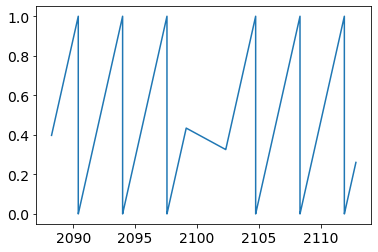

In [67]:
plt.plot(lc.time, phase);

In [68]:
lc["phase"] =phase

In [69]:
lc.head()

,time,flux,phase
0,2088.242413,2804.849347,0.397311
1,2088.242644,2828.087943,0.397375
2,2088.242876,2848.609655,0.397440
3,2088.243107,2813.300663,0.397504
4,2088.243339,2816.514566,0.397569


In [70]:
lc.to_csv(f"../results/observedtimes/{row.ID}_{row.qcs}_{row.lc_n}_{row.mission}.csv",index=False)

In [80]:
system.columns.values

array(['Source Pipeline', 'TIC', 'Full TOI ID', 'TOI Disposition',
       'TIC Right Ascension', 'TIC Declination', 'TMag Value',
       'TMag Uncertainty', 'pl_tranmidepoch', 'Epoch Error', 'pl_orbper',
       'Orbital Period Error', 'pl_trandur', 'Transit Duration Error',
       'Transit Depth Value', 'Transit Depth Error', 'Sectors',
       'Public Comment', 'Surface Gravity Value',
       'Surface Gravity Uncertainty', 'Signal ID', 'Star Radius Value',
       'Star Radius Error', 'Planet Radius Value', 'Planet Radius Error',
       'Planet Equilibrium Temperature (K) Value',
       'Effective Temperature Value', 'Effective Temperature Uncertainty',
       'Effective Stellar Flux Value', 'Signal-to-noise',
       'Centroid Offset', 'TFOP Master', 'TFOP SG1a', 'TFOP SG1b',
       'TFOP SG2', 'TFOP SG3', 'TFOP SG4', 'TFOP SG5', 'Alerted',
       'Updated'], dtype=object)